# CNN for Single Image

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import cv2
import glob

In [ ]:
img = cv2.imread('/content/drive/MyDrive/sensviz/images/pexels-goodcitizen-1612861.jpg')
img.shape

(4348, 3360, 3)

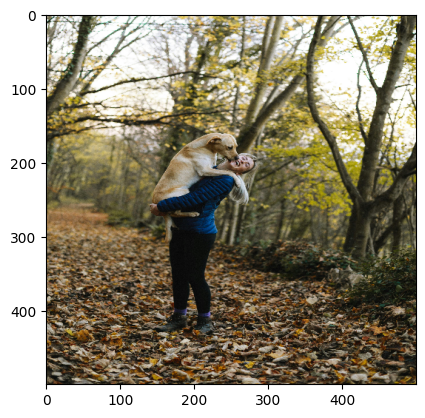

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (500,500))
plt.imshow(img)
plt.show()

## Forward Pass

In [ ]:
def pad_width_size(kernel_size):
  return kernel_size // 2

In [ ]:
pad_width = pad_width_size(3)
pad_width

1

In [2]:
def add_padding_to_image(img, padding_width):
    if img.ndim == 3:
      img_with_padding = np.zeros([(img.shape[0] + padding_width * 2), (img.shape[0] + padding_width * 2), 3])
      r_pad = img_with_padding[:, :, 0]
      g_pad = img_with_padding[:, :, 1]
      b_pad = img_with_padding[:, :, 2]
      r_pad[padding_width : -padding_width, padding_width : -padding_width] = img[:, :, 0]
      g_pad[padding_width : -padding_width, padding_width : -padding_width] = img[:, :, 1]
      b_pad[padding_width : -padding_width, padding_width : -padding_width] = img[:, :, 2]
      fin_arr = np.dstack((r_pad, g_pad, b_pad))
    else:
        img_with_padding = np.zeros([(img.shape[0] + padding_width * 2), (img.shape[0] + padding_width * 2)])
        img_with_padding[padding_width : -padding_width, padding_width : -padding_width] = img
        fin_arr = img_with_padding
    return fin_arr

(504, 504, 3)


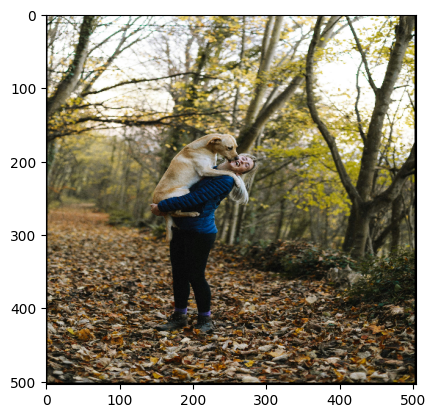

In [ ]:
pad_5x5 = pad_width_size(5)
img_with_padding_5x5 = add_padding_to_image(img, pad_5x5)
img_with_padding_5x5 = img_with_padding_5x5.astype(np.uint8)
print(img_with_padding_5x5.shape)

plt.imshow(img_with_padding_5x5)
plt.show()

In [ ]:
img_with_padding = np.zeros([(img.shape[0] + pad_width * 2), (img.shape[0] + pad_width * 2), 3])
r_pad = img_with_padding[:, :, 0]
r_pad

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
arr = np.ones((5,5,3))
arr

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

**Assume a 3d cube what bellow cell do is slicing cube from first 2 rows with all coulmns**

In [ ]:
arr[:2, :, ]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [ ]:
def pad_size(kernel_size,stride=0):
  return ((kernel_size - 1) + stride)//2

**let say i have kernel of sizd 5x5 and a stride of 1**

In [ ]:
print(pad_size(5,1))

2


In [ ]:
def output_image_size(image,kernel,stride=0):
  pad = pad_size(kernel,stride)
  output_size = ((image - kernel + 2 * pad)//2)+1
  return output_size

**We have Image of 224*224 stride is 4 and kernel size is 7x7**

In [ ]:
print(output_image_size(224,7,4))

114


In [ ]:
img.shape[2]

3

In [ ]:
def get_pools(image,stride,pool_size):
  pools = []
  if image.ndim == 3:
    for i in range(image.shape[2]):
      for j in np.arange(0, image.shape[0] - pool_size + 1, step=stride):
        for l in np.arange(0, image.shape[1] - pool_size + 1, step=stride):
          temp = image[j:j+pool_size,l:l+pool_size,i]
          if temp.shape == (pool_size,pool_size):
            pools.append(temp)
  else:
    for j in np.arange(0, image.shape[0] - pool_size + 1, step=stride):
        for l in np.arange(0, image.shape[1] - pool_size + 1, step=stride):
          temp = image[j:j+pool_size,l:l+pool_size]
          if temp.shape == (pool_size,pool_size):
            pools.append(temp)
  hyperparamter = {}
  hyperparamter['stride'] = stride
  hyperparamter['pool_size'] = pool_size
  return np.array(pools),hyperparamter

In [ ]:
r = np.array([[1,2,3,6],[4,5,6,5],[7,8,9,5],[7,8,9,5]])
g = np.array([[10,12,13,6],[14,15,16,5],[17,18,19,5],[7,8,9,5]])
b = np.array([[11,21,31,6],[41,51,61,5],[7,81,91,5],[7,8,9,5]])
temp = np.dstack((r,g,b))
print(temp.shape)
pools = get_pools(temp,1,2)
pools

(4, 4, 3)


array([[[ 1,  2],
        [ 4,  5]],

       [[ 2,  3],
        [ 5,  6]],

       [[ 3,  6],
        [ 6,  5]],

       [[ 4,  5],
        [ 7,  8]],

       [[ 5,  6],
        [ 8,  9]],

       [[ 6,  5],
        [ 9,  5]],

       [[ 7,  8],
        [ 7,  8]],

       [[ 8,  9],
        [ 8,  9]],

       [[ 9,  5],
        [ 9,  5]],

       [[10, 12],
        [14, 15]],

       [[12, 13],
        [15, 16]],

       [[13,  6],
        [16,  5]],

       [[14, 15],
        [17, 18]],

       [[15, 16],
        [18, 19]],

       [[16,  5],
        [19,  5]],

       [[17, 18],
        [ 7,  8]],

       [[18, 19],
        [ 8,  9]],

       [[19,  5],
        [ 9,  5]],

       [[11, 21],
        [41, 51]],

       [[21, 31],
        [51, 61]],

       [[31,  6],
        [61,  5]],

       [[41, 51],
        [ 7, 81]],

       [[51, 61],
        [81, 91]],

       [[61,  5],
        [91,  5]],

       [[ 7, 81],
        [ 7,  8]],

       [[81, 91],
        [ 8,  9]],

       [[91,

In [ ]:
def max_pooling(pools):
    n = pools.shape[0]
    tgt_side_length = int(np.floor(np.sqrt(n // 3)))
    max_pools = [np.max(pool) for pool in pools]
    return np.array(max_pools).reshape((tgt_side_length, tgt_side_length, 3))

In [ ]:
# pools.shape
max_pools = max_pooling(pools)
max_pools

array([[[ 5,  6,  6],
        [ 8,  9,  9],
        [ 8,  9,  9]],

       [[15, 16, 16],
        [18, 19, 19],
        [18, 19, 19]],

       [[51, 61, 61],
        [81, 91, 91],
        [81, 91, 91]]])

In [ ]:
def avg_pooling(pools,hyperparamter):
    n = len(pools)
    tgt_side_length = int(np.ceil(np.sqrt(n)))
    avg_pools = [np.average(pool) for pool in pools]
    cache = (np.array(avg_pools).reshape((tgt_side_length, tgt_side_length)),hyperparamter)
    return np.array(avg_pools).reshape((tgt_side_length, tgt_side_length)),cache

In [ ]:
avg_pools = avg_pooling(pools)
avg_pools

array([[[ 3.  ,  4.  ,  5.  ],
        [ 6.  ,  7.  ,  6.25],
        [ 7.5 ,  8.5 ,  7.  ]],

       [[12.75, 14.  , 10.  ],
        [16.  , 17.  , 11.25],
        [12.5 , 13.5 ,  9.5 ]],

       [[31.  , 41.  , 25.75],
        [45.  , 71.  , 40.5 ],
        [25.75, 47.25, 27.5 ]]])

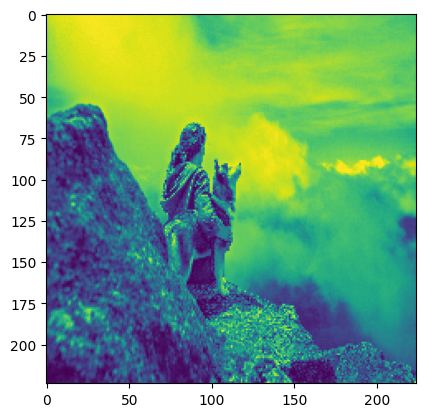

In [ ]:
img2 = cv2.imread("/content/drive/MyDrive/sensviz/images/pexels-madbyte-36372.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img2, (224,224))
plt.imshow(img2)
plt.show()

In [ ]:
img2.shape

(224, 224)

In [ ]:
sharp_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
pad = 0
output_image_size = ((img2.shape[0] - sharp_kernel.shape[0] + 2 * pad)//2)+1
pools = get_pools(img2,2,sharp_kernel.shape[0])
temp = np.zeros((output_image_size,output_image_size))
temp.shape,pools.shape

((111, 111), (12321, 3, 3))

In [ ]:
pools[0],pools.shape

(array([[232, 235, 239],
        [228, 237, 237],
        [228, 233, 233]], dtype=uint8),
 (12321, 3, 3))

In [ ]:
def conv_single(image,filters,b,stride=2,padding='valid'):
  pad = 0
  if padding == 'same':
    pad = pad_size(filters.shape[0],stride)
    img_with_padding = add_padding_to_image(image,pad)
  output_image_size = ((image.shape[0] - filters.shape[0] + 2 * pad)//2)+1
  pools = get_pools(image,2,filters.shape[0])
  temp = np.zeros((output_image_size,output_image_size))
  for idx, pool in enumerate(pools):
          conv_result = np.sum(pool * filters)
          row = idx // output_image_size
          col = idx % output_image_size
          temp[row, col] = conv_result
  hyperparamter = {}
  hyperparamter['stride'] = stride
  hyperparamter['padding'] = pad
  cache = (image,filters,b,hyperparamter)

  return temp,cache

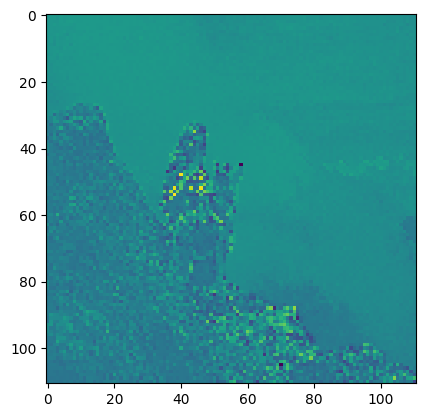

In [ ]:
conv_img,cache = conv_single(img2,sharp_kernel,0)
plt.imshow(conv_img)

## Back Pass

In [ ]:
def conv_backward(dZ, cache):
    (A_prev, W, b, hparameters) = cache
    (n_H_prev, n_W_prev) = A_prev.shape
    (f, f) = W.shape
    stride = hparameters["stride"]
    pad = hparameters["padding"]


    (n_H, n_W) = dZ.shape
    dA_prev = np.zeros(A_prev.shape)
    dW = np.zeros(W.shape)
    db = np.zeros(b.shape)
    A_prev_pad = add_padding_to_image(A_prev, pad)
    dA_prev_pad = add_padding_to_image(dA_prev, pad)
    a_prev_pad = A_prev_pad
    da_prev_pad = dA_prev_pad
    for h in range(n_H):
       for w in range(n_W):
                  vert_start = stride * h
                  vert_end = vert_start + f
                  horiz_start = stride * w
                  horiz_end = horiz_start + f
                  a_slice = a_prev_pad[vert_start:vert_end,horiz_start:horiz_end]
                  da_prev_pad[vert_start:vert_end, horiz_start:horiz_end] += W[:,:] * dZ[ h, w]
                  dW[:] += a_slice * dZ[h, w]
                  db[:] += dZ[ h, w]
    dA_prev[ :, :] = da_prev_pad[pad:-pad, pad:-pad]
    return dA_prev, dW, db

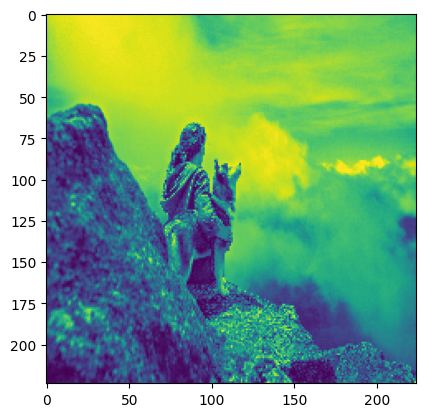

In [ ]:
img2 = cv2.imread("/content/drive/MyDrive/sensviz/images/pexels-madbyte-36372.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img2, (224,224))
plt.imshow(img2)
plt.show()

In [ ]:
sharp_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

In [ ]:
np.random.seed(1)
Z, cache_conv = conv_single(img2, sharp_kernel, np.array([0]),2,padding='same')
Z

array([[252., 236., 238., ..., 178., 222., 240.],
       [241., 212., 255., ..., 229., 221., 226.],
       [248., 238., 260., ..., 229., 246., 247.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [ ]:
(image,filters,b,hyperparamter) = cache_conv


In [ ]:
dA, dW, db = conv_backward(Z, cache_conv)
print(f"dA_prev: {dA_prev}\n dW: {dW} \n db: {db}")

dA_prev: [[   0. -448.    0. ... -443.    0. -466.]
 [-453. 1060. -467. ... 1105. -447. 1130.]
 [   0. -450.    0. ... -467.    0. -473.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]
 dW: [[2.99231136e+08 2.99175090e+08 2.99195930e+08]
 [2.98177010e+08 2.98471131e+08 2.98089330e+08]
 [3.02582042e+08 3.02183213e+08 3.01971326e+08]] 
 db: [1813984.]


In [ ]:
def dv(dz,shape):
  nh,nw = shape
  average = np.prod(shape)
  a = (dz/average)*np.ones(shape)
  return a

In [ ]:
def pool_backward(dA, cache):
  (A_prev, hyperparamter) = cache
  stride = hyperparamter['stride']
  filter = hyperparamter['pool_size']
  (n_h,n_w) = A_prev.shape
  dA_prev = np.zeros(A_prev.shape)
  for h in range(dA.shape[0]):
      for w in range(dA.shape[1]):
                vert_start  = int(h * stride)
                vert_end    = int(h * stride + filter)
                horiz_start = int(w * stride)
                horiz_end   = int(w * stride + filter)
                da = dA[ h, w]
                shape = (filter,filter)
                dA_prev_slice = dA_prev[vert_start: vert_end, horiz_start: horiz_end]
                dv_result = dv(da, shape)
                dA_prev[vert_start: vert_end, horiz_start: horiz_end] += \
                        dv_result[:dA_prev_slice.shape[0], :dA_prev_slice.shape[1]]
  return dA_prev

In [ ]:
# dA.shape

(224, 224)

In [ ]:
Z.shape

(113, 113)

In [ ]:
pools,hyperparamter = get_pools(Z,2,sharp_kernel.shape[0])
# pools
out_pool,pool_cache = avg_pooling(pools,hyperparamter)
out_pool

array([[242.22222222, 252.88888889, 251.22222222, ..., 187.11111111,
        208.33333333, 226.44444444],
       [245.77777778, 252.77777778, 250.33333333, ..., 224.33333333,
        234.33333333, 233.88888889],
       [243.88888889, 246.22222222, 248.22222222, ..., 231.77777778,
        243.77777778, 239.77777778],
       ...,
       [ 26.33333333, 135.11111111, 215.88888889, ...,  41.11111111,
        122.88888889, 171.22222222],
       [ 12.33333333,  32.66666667,  87.88888889, ...,  45.88888889,
         41.55555556,  16.66666667],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [29]:
def zero_pad(X, padding):
    X_pad = np.pad(X, ((0, 0), (padding, padding), (padding, padding), (0, 0)), 'constant', constant_values=(0, 0))
    return X_pad

In [ ]:
out_pool.shape

(56, 56)

In [ ]:
stride = hyperparamter['stride']
filter = hyperparamter['pool_size']
type(stride),type(filter)

(int, int)

In [ ]:
dA_prev = pool_backward(dA,pool_cache)
dA_prev

array([[  0.        ,   0.        , -49.77777778, ...,   0.        ,
        -54.88888889, -54.88888889],
       [  0.        ,   0.        , -49.77777778, ...,   0.        ,
        -54.88888889, -54.88888889],
       [-50.33333333, -50.33333333,  17.66666667, ..., -55.11111111,
         22.77777778,  77.88888889],
       ...,
       [  0.        ,   0.        , -54.77777778, ...,   0.        ,
        -49.66666667, -49.66666667],
       [-53.77777778, -53.77777778,  27.55555556, ..., -51.66666667,
         18.66666667,  70.33333333],
       [-53.77777778, -53.77777778,  82.33333333, ..., -51.66666667,
         68.33333333, 120.        ]])

In [ ]:
import numpy as np
import cv2
import glob

In [ ]:
def load_images(path):
  filenames = glob.glob(path)
  images = []
  for i in filenames:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (224,224))
    images.append(img)
  return np.array(images)


In [ ]:
dataset = load_images('/content/drive/MyDrive/sensviz/images/*.jpg')
dataset.shape

(6, 224, 224)

# Intializing Filters

In [ ]:
def filters(img,kernel_size):
  filters = [
      cv2.GaussianBlur(img,kernel_size,0),
      cv2.blur(img,kernel_size),
      cv2.medianBlur(img,kernel_size[0]),
      cv2.dilate(img,kernel_size),
      cv2.erode(img,kernel_size),
      cv2.boxFilter(img,ddepth=2,ksize=kernel_size),
      cv2.filter2D(img, -1, kernel_size),
      cv2.Canny(img,100,200),
      cv2.dilate(cv2.Canny(img,100,200),kernel_size),
      cv2.erode(cv2.Canny(img,100,20),kernel_size),
      cv2.Laplacian(img,cv2.CV_64F,ksize=kernel_size[0]),

  ]
  return filters

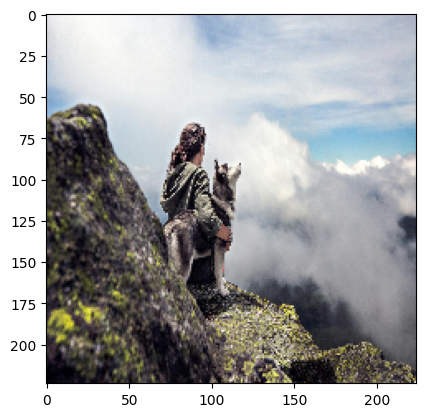

In [ ]:
ig = cv2.imread("/content/drive/MyDrive/sensviz/images/pexels-madbyte-36372.jpg")
ig = cv2.cvtColor(ig, cv2.COLOR_BGR2RGB)
ig = cv2.resize(ig, (224,224))
plt.imshow(ig)
plt.show()

In [ ]:
filters_5x5 = filters(ig,(5,5))
filters_5x5

[array([[[233, 234, 235],
         [234, 235, 235],
         [236, 236, 236],
         ...,
         [175, 180, 197],
         [174, 179, 196],
         [173, 178, 195]],
 
        [[232, 233, 234],
         [233, 234, 235],
         [235, 236, 236],
         ...,
         [174, 179, 197],
         [173, 178, 195],
         [172, 178, 195]],
 
        [[231, 231, 233],
         [232, 232, 234],
         [234, 234, 235],
         ...,
         [173, 178, 196],
         [172, 177, 195],
         [171, 177, 195]],
 
        ...,
 
        [[  3,   3,   8],
         [  3,   3,   8],
         [  3,   3,   8],
         ...,
         [101,  97,  61],
         [103, 101,  61],
         [108, 105,  66]],
 
        [[  5,   5,  10],
         [  4,   4,  10],
         [  4,   4,   9],
         ...,
         [ 95,  89,  63],
         [105, 100,  69],
         [117, 113,  79]],
 
        [[  6,   6,  11],
         [  5,   5,  10],
         [  4,   4,  10],
         ...,
         [ 92,  86,  66],
  

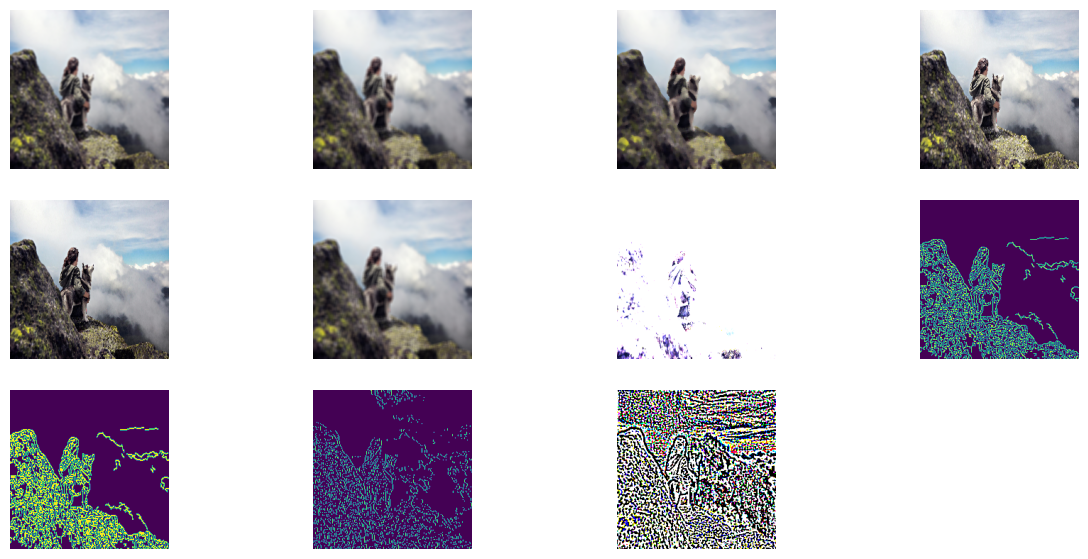

In [ ]:
fig = plt.figure(figsize=(15,7))
index = 1
for i in filters_5x5:
  plt.subplot(3,4,index)
  plt.imshow(i)
  plt.axis('off')
  index=index + 1
plt.show()

(2000, 3000)

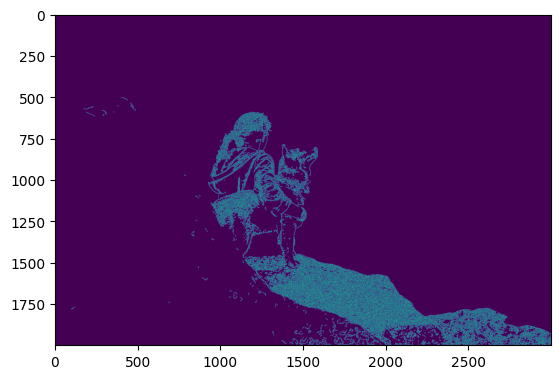

In [ ]:
te = cv2.imread("/content/drive/MyDrive/sensviz/images/pexels-madbyte-36372.jpg")
t = cv2.cvtColor(te, cv2.COLOR_BGR2GRAY)
t = cv2.Canny(t,100,200)
plt.imshow(t)
t.shape

# Concatenating all functions both forward and back pass in a single class for both Conv Layer and Pooling Layer for Multiple inputs

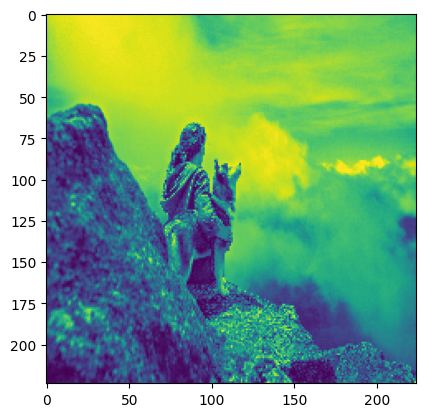

In [ ]:
image = cv2.imread("/content/drive/MyDrive/sensviz/images/pexels-madbyte-36372.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (224,224))
plt.imshow(image)

## CONV Layer

In [6]:
class ConvLayer2D:

    def __init__(self, filters, filter_size, input_channels=3, padding=0, stride=1,learning_rate=0.001, optimizer=None):
        self.filters = filters
        self.filter_size = filter_size
        self.input_channels = input_channels
        self.padding = padding
        self.stride = stride
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        self.cache = None
        self.initialized = False

    def relu(self, Z):
        A = np.maximum(0,Z)
        cache = Z
        return A, cache

    def relu_backward(self, dA, activation_cache):
        Z = activation_cache
        dZ = np.array(dA, copy=True)
        dZ[Z <= 0] = 0

        return dZ


    def conv_single_step(self, a_slice_prev, W, b):

        s = np.multiply(a_slice_prev, W)
        Z = np.sum(s)
        Z = Z + float(b)
        return Z

    def forward(self, A_prev):

        activation_caches = []
        if self.initialized == False:
            np.random.seed(0)
            self.W = np.random.randn(self.filter_size, self.filter_size, A_prev.shape[-1], self.filters)
            self.b = np.random.randn(1, 1, 1, self.filters)
            self.initialized = True
        (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

        (f, f, n_C_prev, n_C) = self.W.shape

        n_H = int((n_H_prev - f + (2 * self.padding)) / self.stride) + 1
        n_W = int((n_W_prev - f + (2 * self.padding)) / self.stride) + 1
        Z = np.zeros((m, n_H, n_W, n_C))

        A_prev_pad = zero_pad(A_prev, self.padding)
        for i in range(m):
            a_prev_pad = A_prev_pad[i]
            for h in range(n_H):
                vert_start = h * self.stride
                vert_end = vert_start + f
                for w in range(n_W):
                    horiz_start = w * self.stride
                    horiz_end = horiz_start + f
                    for c in range(n_C):

                        a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                        weights = self.W[:, :, :, c]
                        biases = self.b[:, :, :, c]
                        Z[i, h, w, c] = self.conv_single_step(a_slice_prev, weights, biases)
                Z[i], activation_cache = self.relu(Z[i])
                activation_caches.append(activation_cache)

        self.cache = (A_prev, np.array(activation_caches))

        return Z

    def backward(self, dZ):
        A_prev, activation_cache = self.cache
        W, b = self.W, self.b
        (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

        (f, f, n_C_prev, n_C) = W.shape

        stride = self.stride
        pad = self.padding

        (m, n_H, n_W, n_C) = dZ.shape

        dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))
        self.dW = np.zeros((f, f, n_C_prev, n_C))
        self.db = np.zeros((1, 1, 1, n_C))

        A_prev_pad = zero_pad(A_prev, pad)
        dA_prev_pad = zero_pad(dA_prev, pad)
        for i in range(m):
            dZ[i] = self.relu_backward(dZ[i], activation_cache[i])
            a_prev_pad = A_prev_pad[i]
            da_prev_pad = dA_prev_pad[i]
            for h in range(n_H):
                vert_start = h * stride
                vert_end = vert_start + f
                for w in range(n_W):
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    for c in range(n_C):
                        a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]

                        da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
                        self.dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
                        self.db[:,:,:,c] += dZ[i, h, w, c]

            if pad:
                dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]
            else:
                dA_prev[i, :, :, :] = dA_prev[i, :, :, :]


        self.update_parameters(self.optimizer)
        return dA_prev

    def update_parameters(self,optimizer=None):
        self.W = self.W - self.learning_rate * self.dW
        self.b = self.b - self.learning_rate * self.db


## Pooling Layer

In [7]:
class Pooling2D:

    def __init__(self, filter_size, stride, mode='max'):
        self.filter_size = filter_size
        self.stride = stride
        self.mode = mode


    def forward(self, A_prev):

        (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

        f = self.filter_size
        stride = self.stride

        n_H = int(1 + (n_H_prev - f) / stride)
        n_W = int(1 + (n_W_prev - f) / stride)
        n_C = n_C_prev

        A = np.zeros((m, n_H, n_W, n_C))
        for i in range(m):
            for h in range(n_H):
                vert_start = h * stride
                vert_end = vert_start + f
                for w in range(n_W):
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    for c in range (n_C):

                        a_prev_slice = A_prev[i,vert_start:vert_end,horiz_start:horiz_end,c]
                        if self.mode == "max":
                            A[i, h, w, c] = np.max(a_prev_slice)
                        elif self.mode == "average":
                            A[i, h, w, c] =  np.mean(a_prev_slice)


        self.cache = (A_prev)
        return A

    def create_mask_from_window(self, x):
        mask = (x == x.max())
        return mask


    def distribute_value(self, dz, shape):
        (n_H, n_W) = shape
        average = dz / (n_H * n_W)
        a = np.ones((n_H, n_W)) * average

        return a



    def backward(self, dA):

        A_prev = self.cache

        stride = self.stride
        f = self.filter_size

        m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
        m, n_H, n_W, n_C = dA.shape

        dA_prev = np.zeros((A_prev.shape))

        for i in range(m):

            a_prev = A_prev[i, :, :, :]
            for h in range(n_H):
                for w in range(n_W):
                    for c in range(n_C):

                        vert_start = h * stride
                        vert_end = vert_start + f
                        horiz_start = w * stride
                        horiz_end = horiz_start + f

                        if self.mode == "max":

                            a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]

                            mask = self.create_mask_from_window(a_prev_slice)

                            dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += (mask * dA[i, h, w, c])

                        elif self.mode == "average":

                            da = dA[i, h, w, c]

                            shape = (f,f)

                            dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += self.distribute_value(da, shape)

        return dA_prev

## Flatten Layer

In [8]:
class Flatten:
    def __init__(self):
        self.input_shape = None
    def forward(self, X):
        self.input_shape = X.shape
        return X.reshape(X.shape[0], -1)
    def backward(self, dout):
        return dout.reshape(self.input_shape)


## Dense Layer

In [9]:
class Dense:

    def __init__(self, units, activation="relu", optimizer=None, learning_rate=0.001):

        self.units = units
        self.W = None
        self.b = None
        self.activation = activation
        self.input_shape = None
        self.optimizer = optimizer
        self.learning_rate = learning_rate

    def forward(self, A):
        if self.W is None:
            self.initialize_weights(A.shape[1])
        self.A = A
        out = np.dot(A, self.W) + self.b
        if self.activation == "relu":
            out = np.maximum(0, out)
        elif self.activation == "softmax":
            out = np.exp(out) / np.sum(np.exp(out), axis=1, keepdims=True)

        return out


    def initialize_weights(self, input_shape):
        np.random.seed(0)
        self.input_shape = input_shape
        self.W = np.random.randn(input_shape, self.units) * 0.01
        self.b = np.zeros((1, self.units))


    def cross_entropy_loss(self, y_true, y_pred):

        loss = - np.mean(y_true * np.log(y_pred + 1e-7))
        return loss

    def backward(self, dout):
        dA = np.dot(dout, self.W.T)
        self.dW = np.dot(self.A.T, dout)
        self.db = np.sum(dout, axis=0, keepdims=True)
        self.update_parameters(self.optimizer)
        return dA


    def update_parameters(self, optimizer=None):

        self.W -= self.learning_rate * self.dW
        self.b -= self.learning_rate * self.db

In [27]:
class CNN:

    def __init__(self,layers, learning_rate=0.001, optimizer=None):
        self.layers = layers
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        self.initialize_network()


    def initialize_network(self):
        for layer in self.layers:
            if isinstance(layer, Dense) or isinstance(layer, ConvLayer2D):
                layer.learning_rate  = self.learning_rate
                layer.optimizer = self.optimizer


    def forward(self, inputs):
        inputs = self.layers[0].forward(inputs)
        for layer in self.layers[1:]:
            inputs = layer.forward(inputs)
        return inputs



    def backward(self, inputs):
        inputs = self.layers[-1].backward(inputs)
        for layer in reversed(self.layers[:-1]):
            inputs = layer.backward(inputs)



    def compute_cost(self, y_true, y_pred):
        cost = self.layers[-1].cross_entropy_loss(y_true, y_pred)
        return cost



    def step_decay(self, epoch, lr, decay_rate=0.1, decay_step=10, lowest_learning_rate=1e-05):
        if lr > lowest_learning_rate:
            new_lr = lr * (decay_rate ** (epoch // decay_step))
        else:
            new_lr = lr
        return new_lr



    def fit(self, X, y, epochs=10, decay_rate=0.2, print_cost=True, plot_cost=False):

        costs = []
        for i in range(epochs):
            self.learning_rate = self.step_decay(i, self.learning_rate, decay_rate)
            predictions = self.forward(X)
            cost = self.compute_cost(y, predictions)
            accuracy = (np.argmax(predictions, axis=1) == np.argmax(y, axis=1)).mean()
            dout = predictions - y
            gradients = self.backward(dout)
            costs.append(cost)
            if print_cost:
                print(f"the cost for iteration {i} = {cost}, accuracy = {str(accuracy*100)}%")

        if plot_cost:
            fig = px.line(y=np.squeeze(costs),title='Cost',template="plotly_dark")
            fig.update_layout(
                title_font_color="#f6abb6",
                xaxis=dict(color="#f6abb6"),
                yaxis=dict(color="#f6abb6")
            )
            fig.show()

    def predict(self, X):
        predictions = self.forward(X)
        return predictions



    def evaluate(self, X, y):

        y_pred = self.predict(X)
        loss = self.compute_cost(y, y_pred)
        accuracy = ((np.argmax(y_pred, axis=1) == np.argmax(y, axis=1)).mean()) * 100
        return f'{accuracy}%'


# Dataset Prepration

In [13]:
!unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [14]:
df = pd.read_csv("/content/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

In [15]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X = X.reshape(-1,28,28,1)
X = X / 255

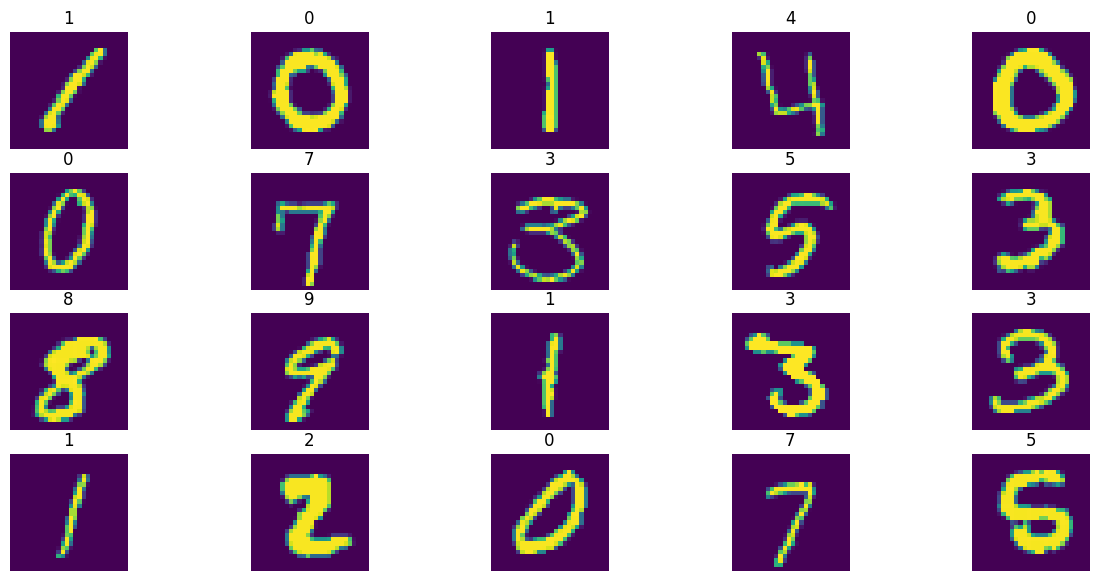

In [18]:
fig = plt.figure(figsize=(15,7))
index = 1
for i in range(20):
  plt.subplot(4,5,index)
  plt.imshow(X[i].reshape(28,28))
  plt.title(y[i])
  plt.axis('off')
  index=index + 1


In [31]:
def one_hot_encode(indices, num_classes):
    one_hot = np.zeros((len(indices), num_classes), dtype=np.float32)
    one_hot[np.arange(len(indices)), indices] = 1
    return one_hot

In [32]:
n_classes = df.label.nunique()

In [33]:
y = one_hot_encode(y, n_classes)

In [39]:
X_train = X[:200]
Y_train = y[:200]
X_test = X[200:]
Y_test = y[200:]

# Model Training

In [40]:
conv2d = ConvLayer2D(8, 3, padding=0,learning_rate=0.001)
maxpool = Pooling2D(2,2,'max')
flatten = Flatten()
dense_relu = Dense(128, activation='relu')
dense = Dense(10,activation='softmax')

In [41]:
layers = [conv2d, maxpool, flatten,dense_relu, dense]

In [42]:
cnn = CNN(layers, learning_rate=0.001)

In [43]:
cnn.fit(X_train, Y_train, 15, 0.5, True, True)

<ipython-input-6-8e7dacf4c85f>:31: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



the cost for iteration 0 = 0.23078326487014375, accuracy = 9.5%
the cost for iteration 1 = 0.22713110560529817, accuracy = 12.5%
the cost for iteration 2 = 0.22363111044585468, accuracy = 12.0%
the cost for iteration 3 = 0.21900831671423737, accuracy = 15.5%
the cost for iteration 4 = 0.21256428543651146, accuracy = 33.0%
the cost for iteration 5 = 0.20387676389098647, accuracy = 44.5%
the cost for iteration 6 = 0.1929005221007885, accuracy = 53.5%
the cost for iteration 7 = 0.17997000219937023, accuracy = 58.5%
the cost for iteration 8 = 0.16556273072267763, accuracy = 61.0%
the cost for iteration 9 = 0.15045842186353123, accuracy = 66.0%
the cost for iteration 10 = 0.13574394297433667, accuracy = 68.5%
the cost for iteration 11 = 0.12196374585334344, accuracy = 70.5%
the cost for iteration 12 = 0.10965895072716564, accuracy = 73.5%
the cost for iteration 13 = 0.09826781842610059, accuracy = 79.0%
the cost for iteration 14 = 0.08825440822935172, accuracy = 83.0%


In [46]:
accuracy = cnn.evaluate(X_test[200:220], Y_test[200:220])
print(f'Accuracy: {accuracy}')

<ipython-input-6-8e7dacf4c85f>:31: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Accuracy: 75.0%
